In [1]:
# importing dependencies
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
#read csv
train_df = pd.read_csv("salary_prediction_ML.csv")
test_df = pd.read_csv("salary_prediction_ML_test.csv")

In [3]:
train_df

,age,workclass,education,marital,occupation,race,sex,workhour,location,above/below50K
0,39,Government,Bachelors,Single,Clerical,White,Male,40,North_America,<=50K
1,50,Self,Bachelors,Married,Managerial,White,Male,13,North_America,<=50K
2,38,Private,High_School_Degree,Divorced,Service,White,Male,40,North_America,<=50K
3,53,Private,Not_Graduated,Married,Service,Black,Male,40,North_America,<=50K
4,28,Private,Bachelors,Married,Managerial,Black,Female,40,Asia_America,<=50K
...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Associate_Degree,Married,Technical,White,Female,38,North_America,<=50K
30158,40,Private,High_School_Degree,Married,Technical,White,Male,40,North_America,>50K
30159,58,Private,High_School_Degree,Widowed,Clerical,White,Female,40,North_America,<=50K
30160,22,Private,High_School_Degree,Single,Clerical,White,Male,20,North_America,<=50K


In [4]:
#separate columns
categorical_columns = ['sex', 'marital', 'workclass', 'education', 'location','race','occupation']
numerical_columns = ['age', 'workhour']


NameError: name 'sns' is not defined

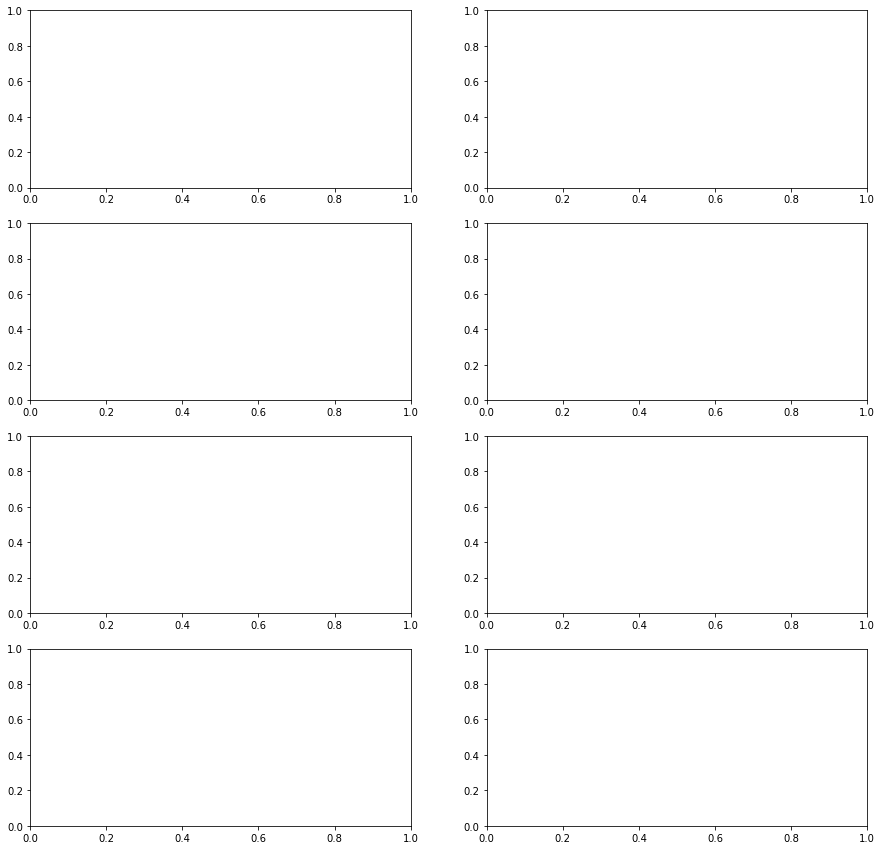

In [5]:
fig,axes = plt.subplots(4,2,figsize=(15,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='above/below50K',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [6]:
##get to know numerical data
print(train_df[numerical_columns].describe())

                age      workhour
count  30162.000000  30162.000000
mean      38.437902     40.931238
std       13.134665     11.979984
min       17.000000      1.000000
25%       28.000000     40.000000
50%       37.000000     40.000000
75%       47.000000     45.000000
max       90.000000     99.000000


In [7]:
#prepare the data for machine learning by encoding the data
train_df_encoded = pd.get_dummies(train_df)


In [8]:
train_df_encoded

,age,workhour,workclass_ Government,workclass_ Private,workclass_ Self,workclass_ Without,education_ Associate_Degree,education_ Bachelors,education_ Graduate,education_ High_School_Degree,...,race_ White,sex_ Female,sex_ Male,location_ Asia,location_ Asia_America,location_ Europe,location_ North_America,location_ North_America(Guam_USVI_etc),above/below50K_ <=50K,above/below50K_ >50K
0,39,40,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,50,13,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
2,38,40,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
3,53,40,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,28,40,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,38,0,1,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,0
30158,40,40,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
30159,58,40,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,1,0
30160,22,20,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0


In [9]:
# Gender_Male: male = 1, female = 0
# Married_Yes: yes = 1, no = 0
# Education_Graduate: grad = 1, not grad = 0
# Self_Employed_Yes: yes = 1, no = 0
# Loan_Status_Y: yes = 1, no = 0 
train_df_encoded = train_df_encoded.drop(columns=['sex_ Female', 'above/below50K_ <=50K'])
train_df_encoded.head()


,age,workhour,workclass_ Government,workclass_ Private,workclass_ Self,workclass_ Without,education_ Associate_Degree,education_ Bachelors,education_ Graduate,education_ High_School_Degree,...,race_ Black,race_ Other,race_ White,sex_ Male,location_ Asia,location_ Asia_America,location_ Europe,location_ North_America,location_ North_America(Guam_USVI_etc),above/below50K_ >50K
0,39,40,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,50,13,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
2,38,40,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
3,53,40,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,28,40,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [10]:
#Split Features and Target Varible
X = train_df_encoded.drop(columns='above/below50K_ >50K')
y = train_df_encoded['above/below50K_ >50K']

#Splitting into Train-Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [11]:
##Model 1: Decision Tree Classifier

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(model1,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(model1,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.945501264039123
Training Data F1 Score  0.8846794703148294
Validation Mean F1 Score:  0.6889606025492315
Validation Mean Accuracy:  0.7710640249597924


In [12]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []

for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)

NameError: name 'sns' is not defined

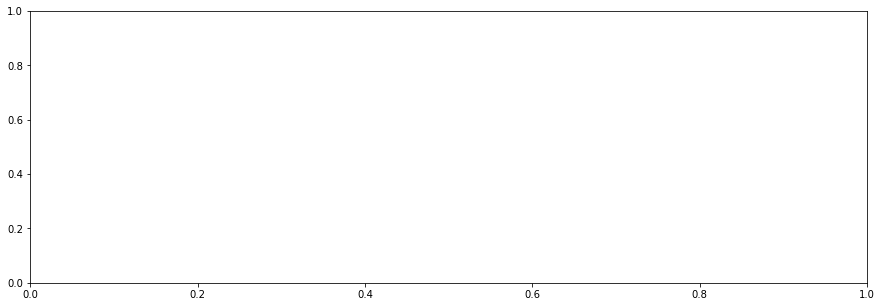

In [13]:
#show the accuracy and validation
Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
#train the the data before the accuracy drops
model1 = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
confusion_matrix(y_test,y_pred)
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

#true negative:64, false positive is high:14, people shouldnt get approved will be approved

In [ ]:
#Model 2: Random Forest Classifier

model2 = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(model2,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(model2,X_train,y_train,cv=5,scoring='accuracy').mean())

In [ ]:
y_predict = model2.predict(X_test)
print("Test F1 Score: ",f1_score(y_test,y_predict))
print("Test Accuracy: ",accuracy_score(y_test,y_predict))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
#Model 3: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [ ]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    model3= LogisticRegression(solver='liblinear')
    model3.fit(X_train,y_train)
    
    y_pred_train_thresh = model3.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = model3.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

In [ ]:
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = model3.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [21]:
#Create the GridReseach
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [22]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................................C=1, penalty=l1; total time=   2.1s
[CV 2/5] END ................................C=1, penalty=l1; total time=   1.6s
[CV 3/5] END ................................C=1, penalty=l1; total time=   1.8s
[CV 4/5] END ................................C=1, penalty=l1; total time=   1.4s
[CV 5/5] END ................................C=1, penalty=l1; total time=   1.1s
[CV 1/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 2/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 3/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 4/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 5/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 1/5] END ................................C=5, penalty=l1; total time=   0.7s
[CV 2/5] END ................................C=5,

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [23]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l1'}
0.8237391675917793


In [24]:
model3 = LogisticRegression(solver='liblinear',C= 1, penalty='l1',max_iter=1000)

In [25]:
model3.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')

In [26]:
y_training_pred = model3.predict(X_train)
y_testing_pred = model3.predict(X_test)

In [27]:
print("Test Accuracy: ",accuracy_score(y_test,y_testing_pred))
print("Test F1 Score: ",f1_score(y_test,y_testing_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_testing_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8188297696005304
Test F1 Score:  0.5889432117337345
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,4157,374,4531
1,719,783,1502
All,4876,1157,6033


In [28]:
import pickle
pickle.dump(model3, open("model.pkl","wb"))

In [30]:
import joblib
filename = 'model3.joblib'
joblib.dump(model3, filename)

['model3.joblib']

NameError: name 'raw_train_data' is not defined

In [7]:
# states_df.to_csv("salary_prediction.csv")